## Base Line CNN

In [592]:
import matplotlib.pyplot as plt
import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Reshape, Multiply, Activation
from tensorflow.keras.layers import RandomRotation  

from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import pandas as pd
from PIL import Image,ImageEnhance
import random

### Loading The Dataset

In [17]:
# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath = "C:/Users/royne/Texas A&m Assignment/ECEN 758 Data Mining/Project/GTSRB/Training"):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class

        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        gtReaded = next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels
images, labels = readTrafficSigns()

### Annotation

In [18]:
rootpath = "C:/Users/royne/Texas A&m Assignment/ECEN 758 Data Mining/Project/GTSRB/Training"
annotate = []

# loop over all 42 classes
for c in range(0,43):
    prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class

    gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
    gtReaded = next(gtReader) # skip header
    # loop over all images in current annotations file
    for row in gtReader:
        annotate.append([row[3],row[4],row[5],row[6]])
    gtFile.close()

#### SET 1

In [593]:

def image_processing_function(image_list):
    distance=70
    sigma=9
    augmented_image = []
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    df = pd.read_csv("Annotate_Neil_Roy.csv",header=None)
    annotate = df.values.tolist()

    for i in range(len(image_list)):
        image_gray = cv2.cvtColor(image_list[i], cv2.COLOR_BGR2GRAY)
        cropped_image = image_gray[int(annotate[i][1]):int(annotate[i][3]), int(annotate[i][0]):int(annotate[i][2])]
        cropped_image = cv2.resize(cropped_image,(32, 32))
        clahe_image = clahe.apply(cropped_image)
        kernel = np.array([[0, -1, 0], 
                    [-1, 5,-1], 
                    [0, -1, 0]])
        sharpened = cv2.filter2D(clahe_image, -1, kernel)
        augmented_image.append(sharpened)


    return augmented_image # returns list of augmented images

augmented_image = image_processing_function(images) # Sending the initial List of Images

augmented_image = np.array(augmented_image)

labels = np.array(labels)
augmented_image = augmented_image/255.0
X_train, X_temp, y_train, y_temp = train_test_split(augmented_image, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 43) # Putting it to categorical Data 
y_test = to_categorical(y_temp, 43) # Putting the Y_Test to Categorical Data
image_resized = np.expand_dims(X_train, axis=-1)

### SET 2 

In [ ]:
import cv2
import numpy as np
import pandas as pd
import random

def preprocess_image_set2(image_list):
    # Read the annotations from CSV
    df = pd.read_csv("Annotate_Neil_Roy.csv", header=None)
    annotate = df.values.tolist()

    augmented_image_set2 = []
    for i in range(len(image_list)):
        image = image_list[i]
        
        # Crop the image based on the annotation coordinates
        x1, y1, x2, y2 = int(annotate[i][0]), int(annotate[i][1]), int(annotate[i][2]), int(annotate[i][3])
        cropped_image = image[y1:y2, x1:x2]

        # Resize the cropped image to 32x32
        resized_image = cv2.resize(cropped_image, (32, 32))

        # Randomly rotate the image by ±10 degrees
        angle = random.uniform(-10, 10)
        center = (resized_image.shape[1] // 2, resized_image.shape[0] // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated_image = cv2.warpAffine(resized_image, rotation_matrix, (32, 32), flags=cv2.INTER_LINEAR)

        # Adjust brightness and contrast
        brightness_factor = random.uniform(0.8, 1.2)
        contrast_factor = random.uniform(0.8, 1.2)
        adjusted_image = cv2.convertScaleAbs(rotated_image, alpha=contrast_factor, beta=0)
        adjusted_image = np.clip(adjusted_image * brightness_factor, 0, 255).astype(np.uint8)

        # Normalize the image to range [0, 1]
        normalized_image = adjusted_image / 255.0

        # Custom normalization using mean and std
        mean = np.array([0.3337, 0.3064, 0.3171])
        std = np.array([0.2672, 0.2564, 0.2629])
        normalized_image = (normalized_image - mean) / std

        # Append the processed image to the list
        augmented_image_set2.append(normalized_image)

    return augmented_image_set2

augmented_image_set2 = preprocess_image_set2(images) # Sending the initial List of Images

augmented_image_set2 = np.array(augmented_image_set2)

labels = np.array(labels)
X_train, X_temp, y_train, y_temp = train_test_split(augmented_image_set2, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 43) # Putting it to categorical Data 
y_test = to_categorical(y_temp, 43) # Putting the Y_Test to Categorical Data
image_resized_2 = np.expand_dims(X_train, axis=-1)

#### SET 3

In [ ]:
def normalize_images(image_list):
    df = pd.read_csv("Annotate_Neil_Roy.csv", header=None)
    annotate = df.values.tolist()
    augmented_image_set3 = []
    for i in range(len(image_list)):
        image = image_list[i]
        x1, y1, x2, y2 = int(annotate[i][0]), int(annotate[i][1]), int(annotate[i][2]), int(annotate[i][3])
        cropped_image = image[y1:y2, x1:x2]
        resized_image = cv2.resize(cropped_image, (32, 32))
        # Assuming image is in the range [0, 255] and converting to [0, 1]
        image = resized_image / 255.0
        
        normalized_image = (image - 0.5) / 0.5
        
        augmented_image_set3.append(normalized_image)

    return augmented_image_set3

augmented_image_set3 = normalize_images(images) # Sending the initial List of Images
augmented_image_set3 = np.array(augmented_image_set3)

labels = np.array(labels)
X_train, X_temp, y_train, y_temp = train_test_split(augmented_image_set3, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 43) # Putting it to categorical Data 
y_test = to_categorical(y_temp, 43) # Putting the Y_Test to Categorical Data
image_resized_2_set3 = np.expand_dims(X_train, axis=-1)

### Baseline CNN

#### For SET 1

In [ ]:
def create_cnn_model_set1():
    
    model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,1)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')])
    return model

In [ ]:
cnn_network_set1 = create_cnn_model_set1()
cnn_network_set1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn_network_set1.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 30, 30, 32)        320       


                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 conv2d_89 (Conv2D)          (None, 2, 2, 256)         295168    
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 1, 1, 256)        0         
 g2D)                                                            
          

In [597]:
history12 = cnn_network_set1.fit(x = image_resized,y = y_train,epochs=30,validation_data=(X_temp,y_test))

Epoch 1/30
666/666 [==============================] - 86s 127ms/step - loss: 1.3692 - accuracy: 0.6118 - val_loss: 0.1755 - val_accuracy: 0.9484
Epoch 2/30
666/666 [==============================] - 81s 122ms/step - loss: 0.1671 - accuracy: 0.9489 - val_loss: 0.0874 - val_accuracy: 0.9752
Epoch 3/30
666/666 [==============================] - 80s 120ms/step - loss: 0.0816 - accuracy: 0.9752 - val_loss: 0.0611 - val_accuracy: 0.9831
Epoch 4/30
666/666 [==============================] - 76s 114ms/step - loss: 0.0542 - accuracy: 0.9830 - val_loss: 0.0814 - val_accuracy: 0.9769
Epoch 5/30
666/666 [==============================] - 79s 118ms/step - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.0655 - val_accuracy: 0.9827
Epoch 6/30
666/666 [==============================] - 64s 96ms/step - loss: 0.0349 - accuracy: 0.9881 - val_loss: 0.0589 - val_accuracy: 0.9854
Epoch 7/30
666/666 [==============================] - 65s 98ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.0569 - val_accu

#### For SET 2

In [ ]:
def create_cnn_model_set23():
    
    model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')])
    return model

In [ ]:
cnn_network_set23 = create_cnn_model_set23()
cnn_network_set23.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn_network_set23.summary()

In [ ]:
history23 = cnn_network_set23.fit(x = image_resized,y = y_train,epochs=30,validation_data=(X_temp,y_test))

### Result For SET 1

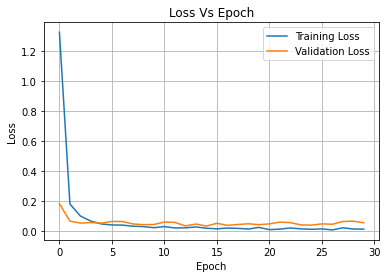

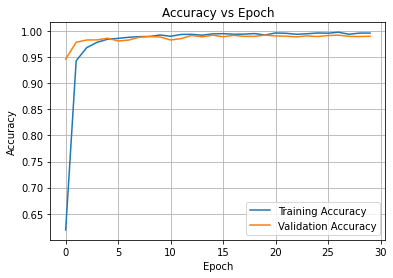

In [ ]:
plt.plot(history12.history['loss'], label='Training Loss')
plt.plot(history12.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Vs Epoch')
plt.legend()
plt.grid()
plt.show()

plt.plot(history12.history['accuracy'], label='Training Accuracy')
plt.plot(history12.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()
plt.grid()
plt.show()

### SET 1 Testing Data

In [609]:
import os
# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns_test(rootpath = "C:/Users/royne/Texas A&m Assignment/ECEN 758 Data Mining/Project/GTSRB/Final_Test/Images"):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images_test = [] # images
    labels_test = [] # corresponding labels
    df =pd.read_csv(rootpath + '/GT-final_test.csv',sep = ';')
    annotate = []

    for _,row in df.iterrows():
        filename = row['Filename']
        label = row['ClassId']

        image_path = os.path.join(rootpath,filename)
        image = cv2.imread(image_path)
        x1 = row['Roi.X1']
        y1 = row['Roi.Y1']
        x2 = row['Roi.X2']
        y2 = row['Roi.Y2']
        images_test.append(image)
        labels_test.append(label)
        annotate.append([x1,y1,x2,y2])

    return images_test,labels_test,annotate

        
        
image_test,labels_test,annotate_test = readTrafficSigns_test()


In [610]:
def image_processing_function(image_list):
    distance=70
    sigma=9
    augmented_image = []
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    df = pd.read_csv("Annotate_Test.csv",header=None)
    annotate = df.values.tolist()

    for i in range(len(image_list)):
        image_gray = cv2.cvtColor(image_list[i], cv2.COLOR_BGR2GRAY)
        cropped_image = image_gray[int(annotate[i][0]):int(annotate[i][2]), int(annotate[i][1]):int(annotate[i][3])]
        cropped_image = cv2.resize(cropped_image,(32, 32))
        clahe_image = clahe.apply(cropped_image)
        kernel = np.array([[0, -1, 0], 
                    [-1, 5,-1], 
                    [0, -1, 0]])
        sharpened = cv2.filter2D(clahe_image, -1, kernel)

        #enhanced_image = perform_suace(cropped_image, distance, sigma/4)
        augmented_image.append(sharpened)


    return augmented_image 
augmented_image_test = image_processing_function(image_test)
labels_test = to_categorical(labels_test,num_classes = 43)

In [ ]:
test_loss, test_acc = cnn_network_set1.evaluate(np.array(augmented_image_test), labels_test)

In [ ]:
labels_predicted_1 = cnn_network_set1.predict(np.array(augmented_image_test))

### SET 2 Testing Data

In [ ]:

# Define the image preprocessing pipeline for TensorFlow
import cv2
import numpy as np
import pandas as pd
import random

def preprocess_image_set2(image_list):
    # Read the annotations from CSV
    df = pd.read_csv("Annotate_Test.csv", header=None)
    annotate = df.values.tolist()

    augmented_image_set2 = []

    for i in range(len(image_list)):
        image = image_list[i]
        
        # Crop the image based on the annotation coordinates
        x1, y1, x2, y2 = int(annotate[i][0]), int(annotate[i][1]), int(annotate[i][2]), int(annotate[i][3])
        cropped_image = image[y1:y2, x1:x2]

        # Resize the cropped image to 32x32
        resized_image = cv2.resize(cropped_image, (32, 32))

        # Randomly rotate the image by ±10 degrees
        angle = random.uniform(-10, 10)
        center = (resized_image.shape[1] // 2, resized_image.shape[0] // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated_image = cv2.warpAffine(resized_image, rotation_matrix, (32, 32), flags=cv2.INTER_LINEAR)

        # Apply random horizontal and vertical flips

        # Adjust brightness and contrast
        brightness_factor = random.uniform(0.8, 1.2)
        contrast_factor = random.uniform(0.8, 1.2)
        adjusted_image = cv2.convertScaleAbs(rotated_image, alpha=contrast_factor, beta=0)
        adjusted_image = np.clip(adjusted_image * brightness_factor, 0, 255).astype(np.uint8)

        # Normalize the image to range [0, 1]
        normalized_image = adjusted_image / 255.0

        # Custom normalization using mean and std
        mean = np.array([0.3337, 0.3064, 0.3171])
        std = np.array([0.2672, 0.2564, 0.2629])
        normalized_image = (normalized_image - mean) / std

        # Append the processed image to the list
        augmented_image_set2.append(normalized_image)

    return augmented_image_set2

augmented_image_test_set2 = preprocess_image_set2(image_test)
labels_test = to_categorical(labels_test,num_classes = 43)


In [ ]:
test_loss, test_acc = cnn_network_set23.evaluate(np.array(augmented_image_test_set2), labels_test)

In [ ]:
labels_predicted_2 = cnn_network_set23.predict(np.array(augmented_image_test_set2))

### SET 3 Testing Data

In [ ]:
def normalize_images(image_list):
    df = pd.read_csv("Annotate_Test.csv", header=None)
    annotate = df.values.tolist()
    augmented_image_set3 = []
    for i in range(len(image_list)):
        image = image_list[i]
        x1, y1, x2, y2 = int(annotate[i][0]), int(annotate[i][1]), int(annotate[i][2]), int(annotate[i][3])
        cropped_image = image[y1:y2, x1:x2]
        resized_image = cv2.resize(cropped_image, (32, 32))
        # Assuming image is in the range [0, 255] and converting to [0, 1]
        image = resized_image / 255.0
        
        normalized_image = (image - 0.5) / 0.5
        
        augmented_image_set3.append(normalized_image)

    return augmented_image_set3
augmented_image_test_set3 = normalize_images(image_test)
labels_test = to_categorical(labels_test,num_classes = 43)


In [ ]:
test_loss, test_acc = cnn_network_set23.evaluate(np.array(augmented_image_test_set3), labels_test)

395/395 [==============================] - 9s 22ms/step - loss: 4.9702 - accuracy: 0.8389


In [ ]:
labels_predicted_3 = cnn_network_set23.predict(np.array(augmented_image_test_set3))

395/395 [==============================] - 7s 17ms/step


### Results for SET 1 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(labels_test,axis=1), labels_predicted_1)

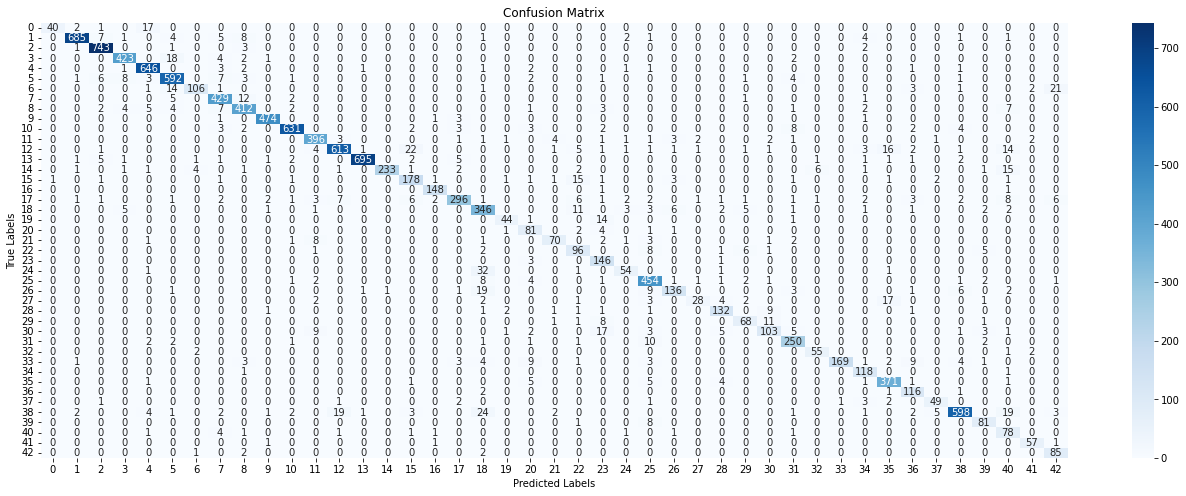

In [295]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(23, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(43), yticklabels=range(43))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(labels_test,axis = 1), labels_predicted_1))

              precision    recall  f1-score   support

           0       0.98      0.67      0.79        60
           1       0.99      0.95      0.97       720
           2       0.97      0.99      0.98       750
           3       0.95      0.94      0.95       450
           4       0.95      0.98      0.96       660
           5       0.92      0.94      0.93       630
           6       0.93      0.71      0.80       150
           7       0.91      0.95      0.93       450
           8       0.91      0.92      0.91       450
           9       0.98      0.99      0.99       480
          10       0.98      0.96      0.97       660
          11       0.93      0.94      0.94       420
          12       0.95      0.89      0.92       690
          13       0.99      0.97      0.98       720
          14       1.00      0.86      0.92       270
          15       0.82      0.85      0.84       210
          16       0.96      0.99      0.97       150
          17       0.94    

### Feature Importance for Baseline CNN trained on SET 1

0
0


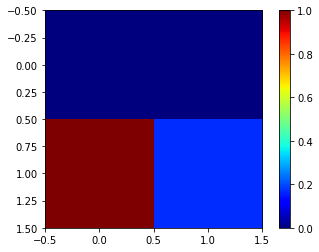

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
import matplotlib.pyplot as plt


i = 15
image = np.expand_dims(augmented_image[i], axis=0) 

last_conv_layer = cnn_network_set1.get_layer('conv2d_53')

grad_model = Model([cnn_network_set1.inputs], [last_conv_layer.output, cnn_network_set1.output])

with tf.GradientTape() as tape:
    last_conv_layer_output, preds = grad_model(image)
    class_idx = np.argmax(preds[0])  # Get the class with the highest prediction
    class_output = preds[:, class_idx]
    print(class_idx)
    print(labels[i])
grads = tape.gradient(class_output, last_conv_layer_output)

pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

last_conv_layer_output = last_conv_layer_output[0]
heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

# Normalize the heatmap
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# Plot the heatmap
plt.imshow(heatmap, cmap='jet')
plt.colorbar()
plt.show()


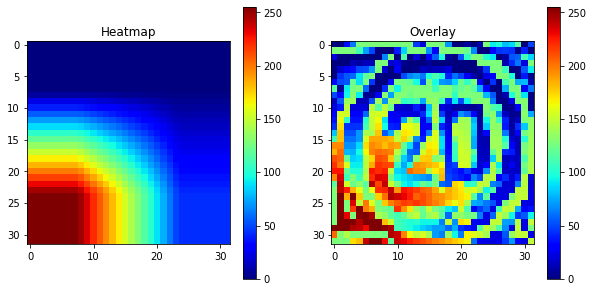

In [425]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# If `heatmap` is a tensor, convert it to a NumPy array; if it's already a NumPy array, skip conversion
if isinstance(heatmap, tf.Tensor):
    heatmap = heatmap.numpy()

# Resize the heatmap to the same dimensions as the input image (e.g., 32x32)
upscaled_heatmap = cv2.resize(heatmap, (32, 32), interpolation=cv2.INTER_LINEAR)

# Normalize the upscaled heatmap to [0, 1]
upscaled_heatmap = np.maximum(upscaled_heatmap, 0)
upscaled_heatmap /= np.max(upscaled_heatmap)

# Convert the heatmap to the same type as the input image
upscaled_heatmap = (upscaled_heatmap * 255).astype(np.uint8)

# Convert the input image to the range [0, 255] if it isn't already
input_image = image.squeeze()  # Assuming `image` is a NumPy array or Tensor
if isinstance(input_image, tf.Tensor):
    input_image = input_image.numpy()
input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())  # Normalize
input_image = (input_image * 255).astype(np.uint8)

# Overlay the heatmap on the input image
overlay = cv2.addWeighted(input_image, 0.5, upscaled_heatmap, 0.5, 0)

# Display the heatmap and overlay
plt.figure(figsize=(10, 5))

# Show the raw heatmap
plt.subplot(1, 2, 1)
plt.imshow(upscaled_heatmap, cmap='jet')
plt.title("Heatmap")
plt.colorbar()

# Show the heatmap overlaid on the input image
plt.subplot(1, 2, 2)
plt.imshow(overlay, cmap='jet')
plt.title("Overlay")
plt.colorbar()

plt.show()
